In [1]:
#In this notebook, I'm going to generate the figures used in the presentation slides. 
import numpy as np
import matplotlib.pyplot as plt
import random
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "-1"
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2' 
import tensorflow as tf
import scipy.ndimage
plt.rcParams['figure.figsize'] = [5,4]
plt.rcParams['figure.dpi'] = 150

In [2]:
gridSize = 200
codist = 20
dispmat = np.zeros((gridSize, gridSize))
for i in range(gridSize):
    for j in range(gridSize):
        dist = np.abs(i-j)+1
        if(dist<codist):
            dist=codist/5
        if(dist>codist*1.5):
            dist = 1000
        val = random.randrange(-10,11)
        dispmat[i,j] = val / dist

(-0.5, 199.5, 199.5, -0.5)

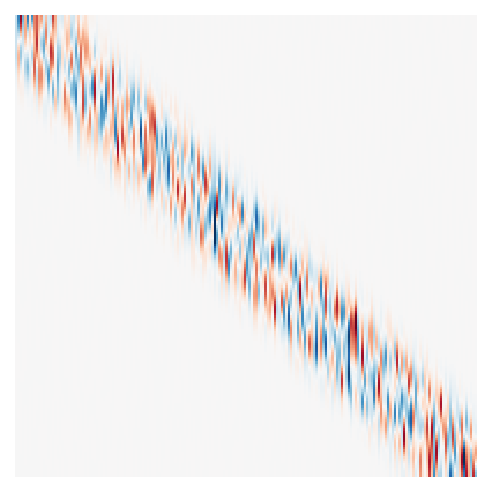

In [3]:
gb = scipy.ndimage.gaussian_filter1d(dispmat, 5)
plt.imshow(gb.T, cmap='RdBu', vmin=-1, vmax=1, interpolation='nearest')
plt.axis('off')

In [4]:
import pandas as pd
import logomaker
import pyBigWig
import pysam

In [21]:
bwf = pyBigWig.open("/scratch/cm2363/oskn-demo/shap/oct4_profile.bw", "r")
bwfC =pyBigWig.open("/scratch/cm2363/oskn-demo/shap/oct4_counts.bw", "r")
genome = pysam.FastaFile("/n/data1/genomes/Mus_musculus/mm10/all_chr.fa")

In [37]:
start = 35504019
span=90
stop = start + span
importances = bwf.values("chr17",  start,stop)
importancesC = bwfC.values("chr17", start, stop)
seq = genome.fetch("chr17", start,stop)
print(seq)

AGGGAGGTTGAGAGTTCTGGGCAGACGGCAGATGCATAACAAAGGTGCATGATAGCTCTGCCCTGGGGGCAGAGAAGATGGTTGGGGAGG


In [38]:
impAr = np.zeros((span,4))
impArC = np.zeros((span,4))
seqAr = np.zeros((span,4))
seqMap = {"A" : 0, "C" : 1, "G": 2, "T": 3}
for i in range(span):
    impAr[i,seqMap[seq[i]]] = importances[i]
    impArC[i,seqMap[seq[i]]] = importancesC[i]
    seqAr[i,seqMap[seq[i]]] = 1

(-0.475, 89.475, -0.0352243073284626, 0.09354913234710693)

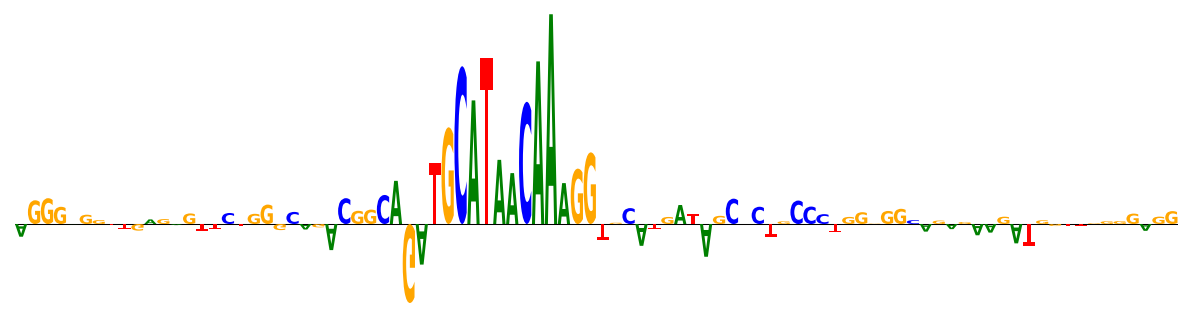

In [39]:
ldf = pd.DataFrame(impAr, columns=list('ACGT'))
logomaker.Logo(ldf)
plt.axis('off')

(-0.475, 89.475, -0.07858052849769592, 0.1991385966539383)

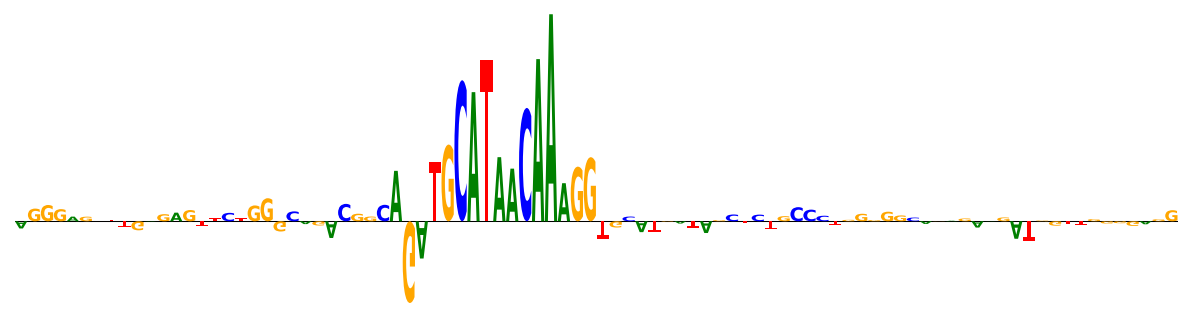

In [40]:
ldfC = pd.DataFrame(impArC, columns=list('ACGT'))
logomaker.Logo(ldfC)
plt.axis('off')

(-0.475, 89.475, -0.0004852268629065651, 0.00789707616873253)

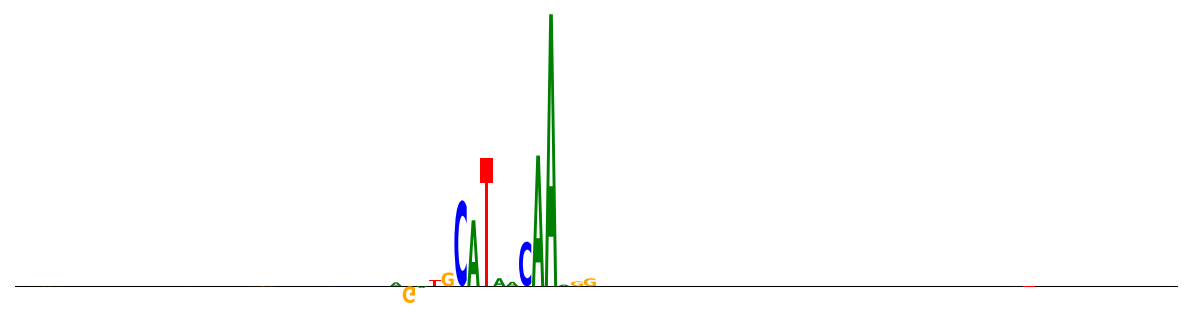

In [41]:
impArC3 = impArC * impArC * impArC
ldfC3 = pd.DataFrame(impArC3, columns=list('ACGT'))
logomaker.Logo(ldfC3)
plt.axis('off')

(-0.475, 9.475, 0.0, 0.00789707616873253)

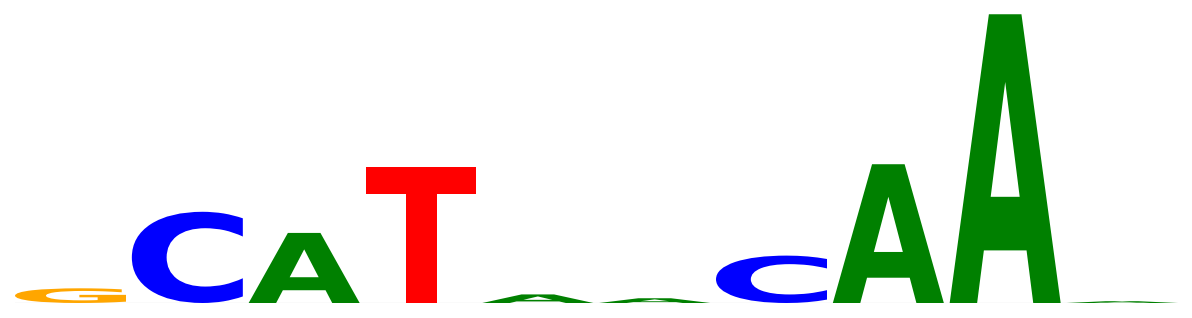

In [50]:
impArC3Trim = impArC3[33:-47]
ldfArC3Trim = pd.DataFrame(impArC3Trim, columns=list("ACGT"))
logomaker.Logo(ldfArC3Trim)
plt.axis('off')

(-0.475, 89.475, 0.0, 1.0)

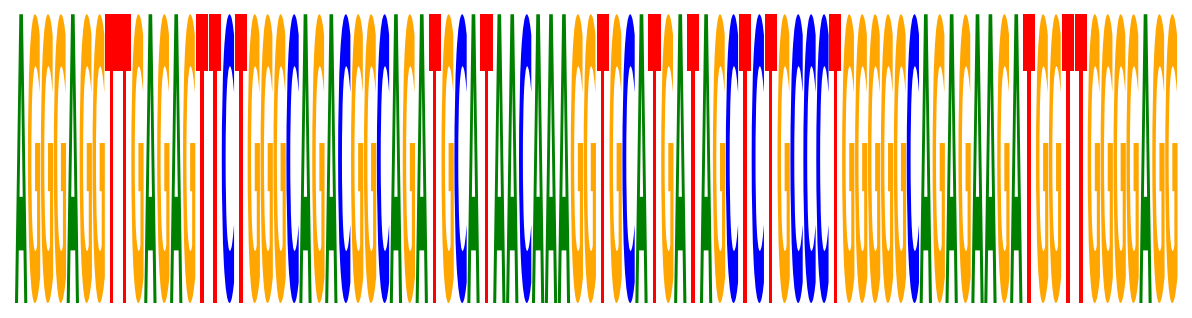

In [42]:
ldfSeq = pd.DataFrame(seqAr, columns=list('ACGT'))
logomaker.Logo(ldfSeq)
plt.axis('off')

In [51]:
conLen = impArC3Trim.shape[0]
convs = []
for mulPos in range(seqAr.shape[0]-conLen):
    seqTrim = seqAr[mulPos:mulPos+conLen]
    prod = np.sum(seqTrim * impArC3Trim)
    convs.append(prod)

(-4.390000000000001, 83.38999999999999, 0.0, 0.000504939041618488)

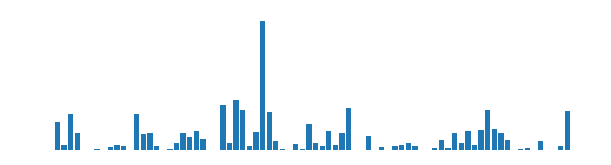

In [58]:
plt.subplot(311)
car = np.array(convs)
car2 = car*car
plt.bar(range(len(convs)),car2)
plt.axis('off')


In [2]:
mnist = tf.keras.datasets.mnist
(mnistXTrain, mnistYTrain), (mnistXTest, mnistYTest) = mnist.load_data()

In [4]:
print(mnistXTrain.shape)
print(mnistYTrain.shape)

(60000, 28, 28)
(60000,)


In [73]:
def genXorExamples(numSamples):
    inputs = np.zeros((numSamples,2))
    outputs = np.zeros((numSamples,))
    for i in range(numSamples):
        i1 = random.randrange(0,2)
        i2 = random.randrange(0,2)
        inputs[i] = [i1,i2]
        if(i1==i2):
            outputs[i] = 0
        else:
            outputs[i] = 1
    return (inputs, outputs)

xTrain, yTrain = genXorExamples(20000)
xTest, yTest = genXorExamples(10)



In [138]:
act = tf.keras.layers.LeakyReLU(alpha=0.1)
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(3, activation=act, use_bias=False),
    tf.keras.layers.Dense(1, activation=act, use_bias=False)
    ])

In [139]:
loss = tf.keras.losses.MeanSquaredError()

In [140]:
model.compile(optimizer='rmsprop', loss=loss)

In [141]:
model.fit(xTrain, yTrain, epochs=20)

Epoch 1/20
625/625 [==============================] - 1s 1ms/step - loss: 0.2958
Epoch 2/20
625/625 [==============================] - 1s 1ms/step - loss: 0.2495
Epoch 3/20
625/625 [==============================] - 1s 1ms/step - loss: 0.1042
Epoch 4/20
625/625 [==============================] - 1s 1ms/step - loss: 5.4164e-04
Epoch 5/20
625/625 [==============================] - 1s 1ms/step - loss: 1.6003e-06
Epoch 6/20
625/625 [==============================] - 1s 1ms/step - loss: 1.6180e-06
Epoch 7/20
625/625 [==============================] - 1s 1ms/step - loss: 1.6124e-06
Epoch 8/20
625/625 [==============================] - 1s 1ms/step - loss: 1.6532e-06
Epoch 9/20
625/625 [==============================] - 1s 1ms/step - loss: 1.5942e-06
Epoch 10/20
625/625 [==============================] - 1s 1ms/step - loss: 1.6291e-06
Epoch 11/20
625/625 [==============================] - 1s 1ms/step - loss: 1.6312e-06
Epoch 12/20
625/625 [==============================] - 1s 1ms/step - loss: 

In [142]:
preds = model(xTest)

In [143]:
preds

<tf.Tensor: shape=(10, 1), dtype=float32, numpy=
array([[ 0.0000000e+00],
       [ 1.0008092e+00],
       [ 0.0000000e+00],
       [ 9.9821264e-01],
       [ 1.0008092e+00],
       [-5.0392153e-04],
       [ 1.0008092e+00],
       [ 0.0000000e+00],
       [ 9.9821264e-01],
       [ 0.0000000e+00]], dtype=float32)>

In [144]:
model.summary()

Model: "sequential_19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_37 (Dense)            (None, 3)                 6         
                                                                 
 dense_38 (Dense)            (None, 1)                 3         
                                                                 
Total params: 9
Trainable params: 9
Non-trainable params: 0
_________________________________________________________________


In [145]:
model.layers[0].weights

[<tf.Variable 'dense_37/kernel:0' shape=(2, 3) dtype=float32, numpy=
 array([[-0.88140476, -0.05799402,  1.1732938 ],
        [ 0.869267  ,  1.1343708 , -0.54951906]], dtype=float32)>]

In [146]:
model.layers[1].weights

[<tf.Variable 'dense_38/kernel:0' shape=(3, 1) dtype=float32, numpy=
 array([[ 1.969433 ],
        [-0.5808547],
        [ 0.9980682]], dtype=float32)>]